<a href="https://colab.research.google.com/github/TGJAISAI/Dil_Food/blob/main/Dil_Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re 


In [ ]:
data = pd.read_csv("/content/menu_dataset (1).csv")
data.head()

,item_id,item_name,item_description,item_type,item_price,ingredients,calories,rating,sales_count,cost_per_item
0,1,noodles rice beef pork dessert,mouth-watering dessert,dessert,19.15,"['noodles', 'rice', 'beef', 'pork']",727,3.06,8,9.02
1,2,pork vegetables fish beef drink,mouth-watering drink,drink,17.69,"['pork', 'vegetables', 'fish', 'beef']",412,1.69,90,6.02
2,3,shrimp bread rice noodles appetizer,mouth-watering appetizer,appetizer,18.68,"['shrimp', 'bread', 'rice', 'noodles']",358,2.89,26,4.44
3,4,vegetables beef dessert,delicious dessert,dessert,13.77,"['vegetables', 'beef']",355,2.50,5,6.59
4,5,fish pork noodles dessert,healthy dessert,dessert,18.80,"['fish', 'pork', 'noodles']",117,3.49,22,8.86


In [ ]:
data.shape

(1000, 10)

In [ ]:
data.dtypes

item_id               int64
item_name            object
item_description     object
item_type            object
item_price          float64
ingredients          object
calories              int64
rating              float64
sales_count           int64
cost_per_item       float64
dtype: object

**Check for missing values** 

Found 0 missing values in the dataset 

In [ ]:
print(data.isnull().sum())

item_id             0
item_name           0
item_description    0
item_type           0
item_price          0
ingredients         0
calories            0
rating              0
sales_count         0
cost_per_item       0
dtype: int64


3. Convert categorical variables into numerical variables using one-hot encoding or
label encoding.

In [ ]:
# profroming one hot encodeing on item_name no inherent ordering in item_name.
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(data[['item_name']]).toarray())
enc_df 

,0,1,2,3,4,5,6,7,8,9,...,706,707,708,709,710,711,712,713,714,715
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
new_dff = data.copy()
item_description_enc_df = pd.DataFrame(enc.fit_transform(data[['item_description']]).toarray())
item_description_enc_df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# profroming one hot encodeing on item_name no inherent ordering in item_name.
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(data[['item_description']]).toarray())
enc_df 

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
item_name = data['primary_ingredient'].unique()
print(item_name)

['healthy drink' 'tasty entree' 'mouth-watering appetizer'
 'mouth-watering entree' 'hearty dessert' 'delicious appetizer'
 'tasty dessert' 'healthy appetizer' 'delicious dessert'
 'hearty appetizer' 'healthy dessert' 'mouth-watering drink'
 'delicious entree' 'healthy entree' 'satisfying drink' 'hearty drink'
 'hearty entree' 'delicious drink' 'satisfying entree' 'tasty drink'
 'mouth-watering dessert' 'tasty appetizer' 'satisfying appetizer'
 'satisfying dessert']


4. Standardise the numerical variables using standard scaling.

In [ ]:
from sklearn.preprocessing import StandardScaler
num_cols = ['item_price', 'calories', 'rating','cost_per_item','sales_count']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])
print(data)

     item_id                            item_name          item_description  \
0          1       noodles rice beef pork dessert    mouth-watering dessert   
1          2      pork vegetables fish beef drink      mouth-watering drink   
2          3  shrimp bread rice noodles appetizer  mouth-watering appetizer   
3          4              vegetables beef dessert         delicious dessert   
4          5            fish pork noodles dessert           healthy dessert   
..       ...                                  ...                       ...   
995      996        chicken tofu fish bread drink             healthy drink   
996      997               fish pork shrimp drink           delicious drink   
997      998             shrimp tofu rice dessert         delicious dessert   
998      999                       pork appetizer           tasty appetizer   
999     1000                          rice entree            healthy entree   

     item_type  item_price                         

**Part 2: String Operations**

Extract the primary ingredient used in each menu item from the ingredients column.
Create a new column called "is_vegetarian" that indicates whether the menu item is
vegetarian or not.

In [ ]:
vegetarian_keywords = ['vegetarian', 'tofu', 'tempeh', 'beans', 'legumes', 'vegetables', 'grains']

def extract_ingredient(ingredients):
    ingredient_list = ingredients.split(',')
    
    # Use regular expressions to extract the first word in each ingredient as the primary ingredient
    primary_ingredient_list = []
    for ingredient in ingredient_list:
        match = re.search(r'\b\w+\b', ingredient)
        if match:
            primary_ingredient_list.append(match.group(0))
    
    
    if len(primary_ingredient_list) > 0:
        return primary_ingredient_list[0]
    else:
        return 'unknown'

data['primary_ingredient'] = data['ingredients'].apply(extract_ingredient)


def is_vegetarian(primary_ingredient):
    primary_ingredient = primary_ingredient.lower()
    for keyword in vegetarian_keywords:
        if keyword in primary_ingredient:
            return True
    return False

data['is_vegetarian'] = data['primary_ingredient'].apply(is_vegetarian)

print(data.head())


   item_id                            item_name          item_description  \
0        1       noodles rice beef pork dessert    mouth-watering dessert   
1        2      pork vegetables fish beef drink      mouth-watering drink   
2        3  shrimp bread rice noodles appetizer  mouth-watering appetizer   
3        4              vegetables beef dessert         delicious dessert   
4        5            fish pork noodles dessert           healthy dessert   

   item_type  item_price                             ingredients  calories  \
0    dessert    1.484178     ['noodles', 'rice', 'beef', 'pork']  0.607508   
1      drink    1.149469  ['pork', 'vegetables', 'fish', 'beef'] -0.608257   
2  appetizer    1.376429  ['shrimp', 'bread', 'rice', 'noodles'] -0.816674   
3    dessert    0.250796                  ['vegetables', 'beef'] -0.828253   
4    dessert    1.403940             ['fish', 'pork', 'noodles'] -1.746831   

     rating  sales_count  cost_per_item  ...  708  709  710  711  71

# Menu Item Analysis

Create a histogram to visualise the distribution of menu item prices.

1. Create a histogram to visualise the distribution of menu item prices.

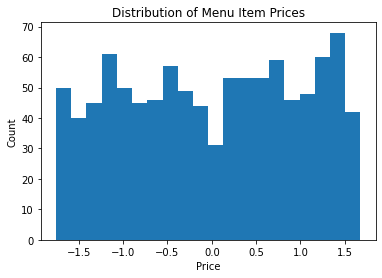

In [ ]:
plt.hist(data['item_price'], bins=20)  
plt.xlabel('Price') 
plt.ylabel('Count')
plt.title('Distribution of Menu Item Prices')
plt.show()

2. Create a scatter plot to visualise the relationship between menu item rating and price

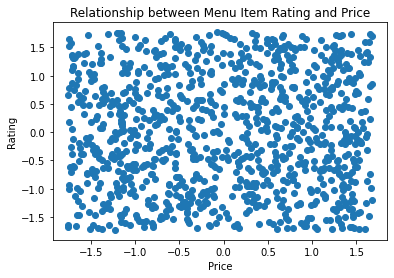

In [ ]:
plt.scatter(data['item_price'], data['rating'])
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Relationship between Menu Item Rating and Price')
plt.show()

In [ ]:
import seaborn as sns
top_5 = data.sort_values(by='sales_count', ascending=False).head(5)
top_5
# item_name = list(top_5['item_name'])
# sales_count = list(top_5['sales_count'])
  
# fig = plt.figure(figsize = (50, 10))
# plt.bar(item_name, sales_count, color ='maroon',
#         width = 0.4)

 
# plt.xlabel("Courses offered")
# plt.ylabel("No. of students enrolled")
# plt.title("Students enrolled in different courses")
# plt.show()

,item_id,item_name,item_description,item_type,item_price,ingredients,calories,rating,sales_count,cost_per_item
34,35,noodles vegetables tofu dessert,tasty dessert,dessert,12.16,"['noodles', 'vegetables', 'tofu']",691,1.70,100,7.00
322,323,chicken bread entree,healthy entree,entree,18.51,"['chicken', 'bread']",955,1.66,100,4.00
950,951,noodles tofu entree,delicious entree,entree,18.99,"['noodles', 'tofu']",940,1.06,100,5.33
236,237,rice pork vegetables entree,tasty entree,entree,14.36,"['rice', 'pork', 'vegetables']",252,3.96,100,8.26
307,308,rice drink,healthy drink,drink,19.83,['rice'],851,4.81,100,10.52


3. Calculate the average rating for each menu item type (appetiser, entree, dessert,
etc.)

item_type
appetizer    3.009496
dessert      2.887634
drink        3.048917
entree       2.979300
Name: rating, dtype: float64


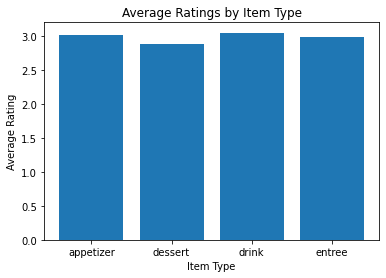

In [ ]:
avg_ratings_by_type = data.groupby('item_type')['rating'].mean()
print(avg_ratings_by_type)
plt.bar(avg_ratings_by_type.index, avg_ratings_by_type.values)
plt.xlabel('Item Type')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Item Type')
plt.show()

4.Calculate the total revenue generated by the restaurant in the past quarter.


In [ ]:
data['revenue'] = data['sales_count'] * data['item_price']

total_revenue = data['revenue'].sum()

print("Total revenue for the past quarter: {:.2f}".format(total_revenue))

Total revenue for the past quarter: 625215.21


5. Calculate the gross profit margin for each menu item.

In [ ]:
data['gross_profit'] = data['item_price'] -  data['cost_per_item'] 
data


,item_id,item_name,item_description,item_type,item_price,ingredients,calories,rating,sales_count,cost_per_item,revenue,gross_profit
0,1,noodles rice beef pork dessert,mouth-watering dessert,dessert,19.15,"['noodles', 'rice', 'beef', 'pork']",727,3.06,8,9.02,153.20,10.13
1,2,pork vegetables fish beef drink,mouth-watering drink,drink,17.69,"['pork', 'vegetables', 'fish', 'beef']",412,1.69,90,6.02,1592.10,11.67
2,3,shrimp bread rice noodles appetizer,mouth-watering appetizer,appetizer,18.68,"['shrimp', 'bread', 'rice', 'noodles']",358,2.89,26,4.44,485.68,14.24
3,4,vegetables beef dessert,delicious dessert,dessert,13.77,"['vegetables', 'beef']",355,2.50,5,6.59,68.85,7.18
4,5,fish pork noodles dessert,healthy dessert,dessert,18.80,"['fish', 'pork', 'noodles']",117,3.49,22,8.86,413.60,9.94
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,chicken tofu fish bread drink,healthy drink,drink,11.40,"['chicken', 'tofu', 'fish', 'bread']",822,1.56,21,2.65,239.40,8.75
996,997,fish pork shrimp drink,delicious drink,drink,7.32,"['fish', 'pork', 'shrimp']",290,1.00,40,2.62,292.80,4.70
997,998,shrimp tofu rice dessert,delicious dessert,dessert,16.10,"['shrimp', 'tofu', 'rice']",684,3.15,48,7.19,772.80,8.91
998,999,pork appetizer,tasty appetizer,appetizer,5.26,['pork'],992,4.48,49,1.85,257.74,3.41


# Part 4: Revenue Optimization



1 .identify the menu items with the lowest gross profit margins.

In [ ]:
data['gross_profit_margin'] = data['item_price'] - data['cost_per_item']
menu_sorted = data.sort_values(by='gross_profit_margin')
lowest_profit_items = menu_sorted.head(10)
print(lowest_profit_items)

     item_id                          item_name          item_description  \
467      468          bread rice tofu appetizer  mouth-watering appetizer   
336      337           shrimp beef bread entree     mouth-watering entree   
935      936               pork bread appetizer         healthy appetizer   
708      709        rice beef tofu pork dessert             tasty dessert   
404      405      tofu fish shrimp rice dessert            hearty dessert   
462      463                 chicken tofu drink              hearty drink   
445      446                        rice entree            healthy entree   
395      396  beef bread fish chicken appetizer       delicious appetizer   
470      471                  tofu fish dessert    mouth-watering dessert   
868      869            vegetables shrimp drink             healthy drink   

     item_type  item_price                           ingredients  calories  \
467  appetizer        5.17             ['bread', 'rice', 'tofu']       799

3. Use the sales count and gross profit margin data to identify which menu items should
be promoted or removed from the menu

In [ ]:
grouped_data = data.groupby(['item_name']).agg({'sales_count': 'sum', 'gross_profit_margin': 'mean'})
sorted_data = grouped_data.sort_values('sales_count', ascending=False)
print(sorted_data.head())

                sales_count  gross_profit_margin
item_name                                       
fish appetizer          727             7.609091
bread entree            551             7.728889
bread dessert           511             7.680000
fish entree             505             8.600000
tofu drink              495             8.127500
Empty DataFrame
Columns: [sales_count, gross_profit_margin]
Index: []


In [ ]:
low_sales_items = sorted_data[(sorted_data['sales_count'] < 50) & (sorted_data['gross_profit_margin'] < 0.3)]
print(low_sales_items)

Empty DataFrame
Columns: [sales_count, gross_profit_margin]
Index: []


Develop a plan for optimising the menu to maximise revenue

In [ ]:
#identify the top-selling and most profitable items
item_sales = data.groupby('item_name').agg({'sales_count': 'sum', 'gross_profit': 'sum'})
item_sales = item_sales.sort_values(by='sales_count', ascending=False)
item_profit = item_sales.sort_values(by='gross_profit', ascending=False)
# print the top 10 most profitable items
print(item_profit.head(10))

                    sales_count  gross_profit
item_name                                    
beef entree                 392         92.96
fish appetizer              727         83.70
shrimp dessert              335         79.28
bread dessert               511         76.80
pork appetizer              453         75.94
vegetables dessert          432         73.04
chicken dessert             369         71.45
noodles entree              212         69.86
bread entree                551         69.56
bread drink                 438         66.17


In [ ]:
#Removing the items with low sales and low gross profit
# This will help us in  streamline the menu and reduce the complexity of the kitchen operations.
# This can also help to reduce food waste and inventory costs.

item_sales = data.groupby('item_name').agg({'sales_count': 'sum', 'gross_profit': 'sum'})
item_sales = item_sales.sort_values(by='sales_count', ascending=True)
item_profit = item_sales.sort_values(by='gross_profit', ascending=True)
print(item_profit.head(10))

                                        sales_count  gross_profit
item_name                                                        
bread rice tofu appetizer                        62          2.22
shrimp beef bread entree                         88          2.23
pork bread appetizer                             43          2.28
rice beef tofu pork dessert                      74          2.32
tofu fish shrimp rice dessert                    19          2.33
beef bread fish chicken appetizer                80          2.43
tofu shrimp vegetables entree                    49          2.54
bread vegetables shrimp tofu appetizer           21          2.55
beef vegetables pork entree                      19          2.63
shrimp noodles fish vegetables entree            33          2.67


# Analyze the pricing of each item to ensure that the prices are competitive and in line with the market. Consider adjusting the prices of low-selling items to increase their profitability, or offering promotions to encourage customers to try them.

# Consider introducing new items based on customer feedback, market trends, or seasonal ingredients. These items should be priced competitively and have a high potential for profitability.

**1. A brief description of the dataset and the problem you are trying to solve**

data is a collection of information that typically includes a list of food and beverage items available at a restaurant . This data can include the name of the dish, a item_description of the ingredients, pricing, and any relevant dietary informatio , calories



**3. A summary of the data manipulation and wrangling steps you performed.**

Check for missing values with the help of pandas isnull funtions. The dataset has no null values present.


In this cases where there is no inherent order in the categories data, So we have used One-Hot Encoding 

Used Standard scaling, to the numerical values 


**4. A summary of the string operations you performed.**



Define a list of keywords that indicate a menu item is vegetarian
Define a function to extract the primary ingredient used in each menu item from the ingredients column
Split the ingredients string into individual ingredients using commas as the delimiter
Use regular expressions to extract the first word in each ingredient as the primary ingredient
 If there is at least one primary ingredient, return the first one Otherwise, return "unknown"
  Define a function to check if a menu item is vegetarian based on the keywords list


**5. Create a histogram to visualise the distribution of menu item prices.**

Uniform distribution probability distribution in which all values within a given range are equally likely to occur the price is unifrom distribution 

**6.Identify the top 5 most popular menu items based on sales count**
This top 5 items

	noodles vegetables tofu dessert	
    chicken bread entree
    noodles tofu entree
    rice pork vegetables entree	
    rice drink	

**7.Calculate the average rating for each menu item type (appetiser, entree, dessert, etc.)**

#appetizer    3.009496
#dessert      2.887634
#drink        3.048917
#entree       2.979300



**8. Calculate the total revenue generated by the restaurant in the past quarter.**

Total revenue for the past quarter: 625215.21
